In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("gbm-data.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
np_arr = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           17.42s
         2           0.9192           16.70s
         3           0.8272           15.42s
         4           0.7834           14.08s
         5           0.7109           14.14s
         6           0.6368           14.93s
         7           0.5797           14.87s
         8           0.5610           14.14s
         9           0.5185           14.13s
        10           0.4984           13.65s
        20           0.1999           12.94s
        30           0.1313           11.67s
        40           0.0790           11.05s
        50           0.0511           10.47s
        60           0.0352            9.89s
        70           0.0245            9.30s
        80           0.0162            8.77s
        90           0.0114            8.20s
       100           0.0077            7.69s
       200           0.0004            2.20s
Min metric log_loss: 0.5822942594278475 ; Iteration: 1

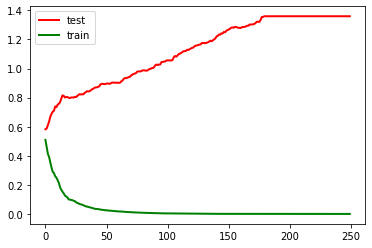

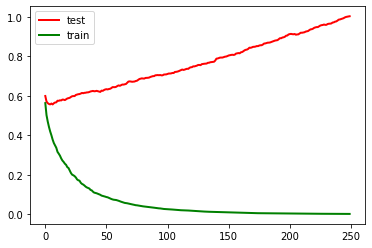

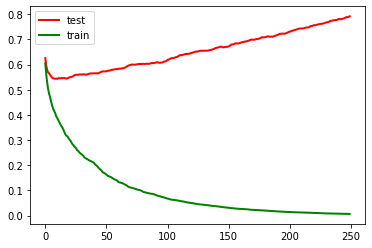

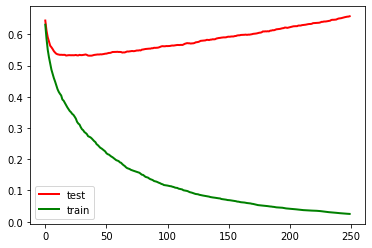

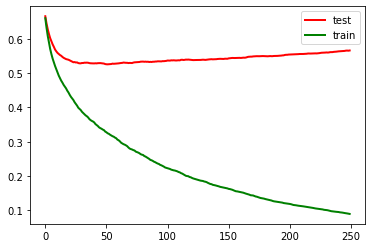

In [3]:
def sigm_func(y_pred):
    return 1.0 / (1.0 + np.exp(-y_pred))

def log_loss_calc(clf, X, y):
    return [log_loss(y, sigm_func(y_pred=y_pred)) for y_pred in clf.staged_decision_function(X)]

min_dict = {}
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    print()
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    clf.fit(X_train, y_train)
    log_loss_train = log_loss_calc(clf, X_train, y_train)
    log_loss_test = log_loss_calc(clf, X_test, y_test)
    plt.figure()
    plt.plot(log_loss_test, "r", linewidth=2)
    plt.plot(log_loss_train, "g", linewidth=2)
    plt.legend(["test", "train"])
    plt.show()
    min_value = min(log_loss_test)
    min_index = log_loss_test.index(min_value) + 1
    min_dict[i] = min_value, min_index
    print("Min metric log_loss: {0} ; Iteration: {1}".format(min_value, min_index))

In [8]:
min_value, min_index = min_dict[0.2]
print(round(min_value, 2), min_index)

0.53 37


In [7]:
clf = RandomForestClassifier(n_estimators=min_index, random_state=241)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

print(round(test_loss, 2))


0.54
